In [13]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyparsing import alphanums

导入数据集，要把包含训练数据的文件和这个代码文件放在同一目录下，否则就需要用绝对路径访问代码

In [14]:
path = 'exldatal.txt'
data = pd.read_csv(path,header=None,names=['Population','Profit'])#csv相当于将读取出的数据作为表格
data.head()#打印(预览一下读出来的数据)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


对于数据数据，结果里的索引将包括计数，平均值，标准差，最小值，最大值以及较低的百分位数50。默认情况下，较低的百分位数为25,较高的百分位数为75。50百分位数与中位数相同

In [15]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


数据可视化，绘制散点图kind:取值为line或scatter,后者为默认值图像大小.

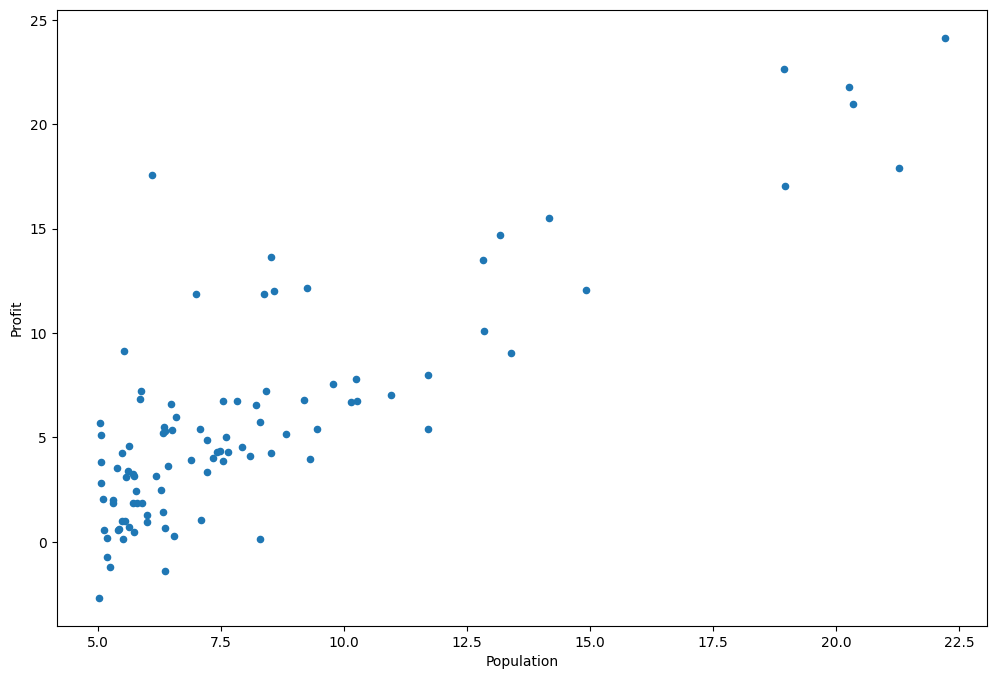

In [16]:
data.plot(kind='scatter',x='Population',y='Profit',figsize=(12,8))#可视化，把数据画出来
plt.show()

然后使用梯度下将来实现线性回归，首先要先创建一个以参数为特函数的代价函数，与开头说的类似，为了统一，插入一列为1

In [17]:
data.insert(0,'ONES',1)#参数为 下标 名称 插入的数据
data.head()

,ONES,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


接下来写一个函数，来实现代价函数的计算，也就是cost函数

In [30]:
def compute_cost(X,y,theta):#theta就是那个参数
    inner = np.power(((X*theta.T)-y),2)#就是计算[(wx-b) - y]的平方
    return np.sum(inner)/(2*len(X))#SUM是把矩阵上的元素都进行求和

现在来做变量初始化，shape[0]为第一维的长度（行数），shape[1]为第二维的长度（列数），在pandas库中利用iloc选取数据
“，”前面表示你要抽取哪些行，“，”后面表示你想要抽取哪些列，如果逗号前面就是两个冒号，那就表示抽取所有的行，如果不取所有的行和列，那就是使用冒号，比如要取3～5行和4～7列，那么就应该写成data.iloc(3:6,6:8)这样的形式，但是同样也遵守python中左闭右开的形式，所有右边多加了1

In [19]:
cols = data.shape[1]#列数
X = data.iloc[:,0:cols-1]#X是取所有行，去掉最后一类，也就是去掉最后一列的结果profit
y = data.iloc[:,cols-1:cols]#y是取所有行，但是只取最后一列，也就是只分裂出结果profit

观察下X取出来的行是否正确,运行了可以看到此时X取出的就是前面两列，已经没有profit了

In [20]:
X.head()

,ONES,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


在检查一下Y是否分对了,运行下面代码可以看到y就是只有profit这一列

In [21]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数应该是numpy矩阵，所以要先对X和y进行转换，然后才能使用他们，我们还要初始化参数theta,即把所有theta先初始化为0,因为此时写的是单变量线性回归，所以只有一个X1,但是运算要进行的是wx - b,所以参数theta其实是一个包含w,b的（1*2）的行矩阵

In [22]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))#将这个数组array[0,0]，强制变换成一个1*2的矩阵

In [25]:
print(X.shape)
print(y.shape)
print(theta.shape)

(97, 2)
(97, 1)
(1, 2)


In [33]:
cost = compute_cost(X,y,theta)
print(cost)

32.072733877455676


### **下面就是使用梯度下降来修改theta,让cost函数趋于0,从而使得有一条直线能够拟合数据**

首先计算一下J分别对w和b的偏导数就可以知道，对w的偏导数就是 (1/n)*残差*xi,对y的偏导就是 (1/n)*残差
更新参数的方程就是：theta(new) = theta(old) - a(学习率)*J对theta的偏导数，由此就可以写出梯度下降的步骤

In [38]:
def gredience(X,Y,theta,times,alpha):#times是迭代次数,alpha是学习率
    temp = np.matrix(np.zeros(theta.shape))#用于临时存储更新后的参数，最终修改的结果要通过它放入theta中
    param = int(theta.shape[1])#reval()计算需要求解的参数个数，作用是将多维降至一维
    cost = np.zeros(times)#创造和迭代次数一样多列数的一个0数组，存放每次迭代后的cost函数值
    for i in range(times):
        #先计算残差
        error = (X*theta.T)-y
        for j in range(param):
            #现在来逐个更新参数
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j] - ((alpha/len(X))*np.sum(term))
        #现在就把一次参数更新后的新参数传入给theta覆盖旧的参数，然后再计算在新参数下的cost(损失函数的值的变化)
        theta = temp
        cost[i] = compute_cost(X,y,theta)

    return theta,cost

初始化一些附加变量，比如学习率alpha,迭代次数times

In [49]:
alpha = 0.01
times = 1100

In [52]:
newThere,cost = gredience(X, y, theta, times, alpha)
print(newThere)
print(cost)

[[-3.34942856  1.13814663]]
[6.73719046 5.93159357 5.90115471 ... 4.50434355 4.50424496 4.50414672]


In [53]:
new_cost = compute_cost(X,y,newThere)
print(new_cost)

4.504146719537086


然后就是把线性模型和数据绘制出来

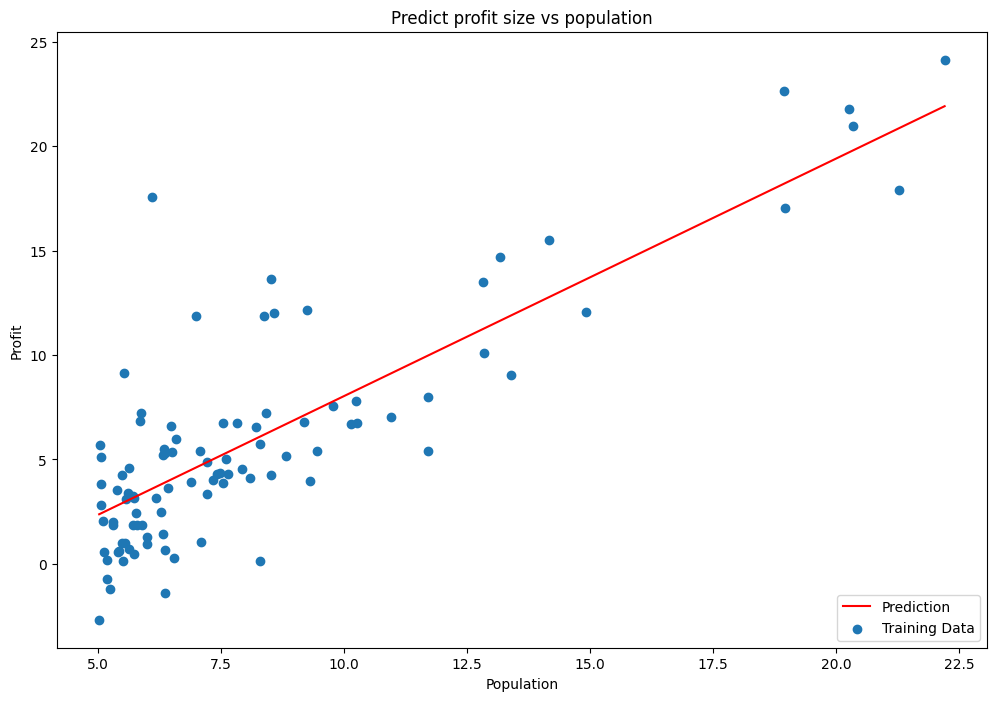

In [54]:
x = np.linspace(data.Population.max(),data.Population.min(),100)#抽样范围为dta数据中population那一栏的最大值到最小值之间，抽取100个样本
#定义一个类似于函数表达式的东西
f = newThere[0,0] + (newThere[0,1]*x)#就是函数表达式 y = b + w * x

fig,ax = plt.subplots(figsize = (12,8))#创建一个12*8的画布，并生成一个单独的子图，fig是存储画布的对象，而ax是存储子图的对象
ax.plot(x,f,'r',label = 'Prediction')#这是子图（arex）的方法，用于在子图上绘制折线图，传入x,y轴的数据，然后规定折线颜色和这条折线的图例标签
ax.scatter(data.Population,data.Profit,label = 'Training Data')#在子图上绘制散点图，传入每个点的X,Y轴坐标，然后给这些点规定图例标签
ax.legend(loc = 4)#在右下角设置标签
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predict profit size vs population')
plt.show()

下面也可以把损失函数的迭代曲线给画出来

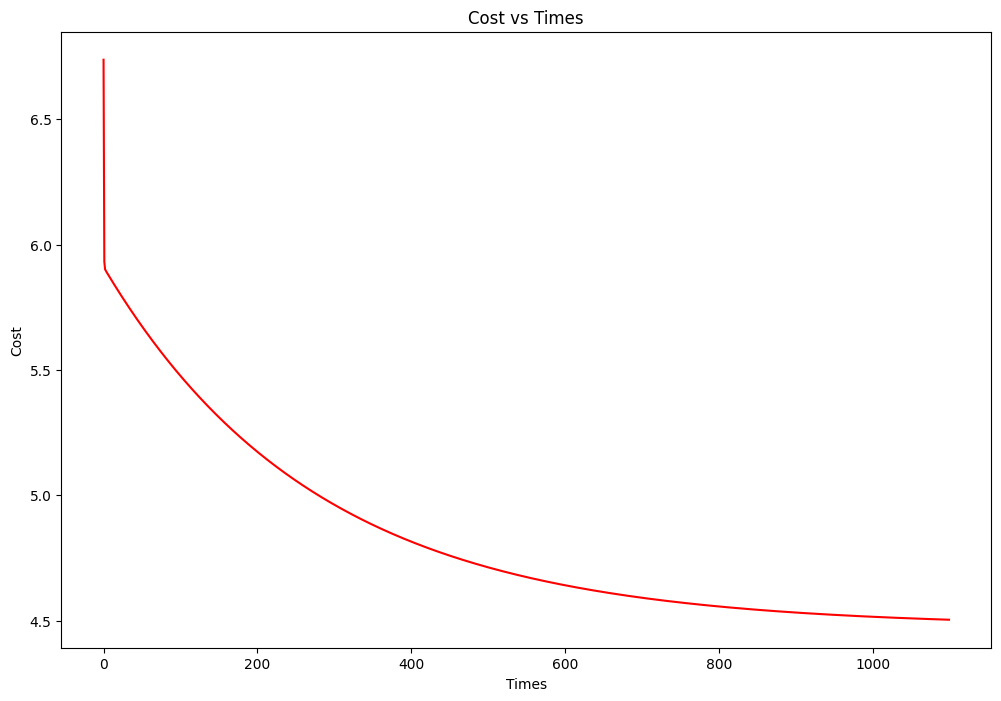

In [55]:
fig,ax = plt.subplots(figsize = (12,8))
ax.plot(np.arange(times),cost,'r',label = 'Cost')
ax.set_xlabel('Times')
ax.set_ylabel('Cost')
ax.set_title('Cost vs Times')
plt.show()